In [ ]:
!pip install sqlalchemy
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=430e6fbb131643f593bf5d2bcc63c0b7b8371c78716c53f1205b618095b8a98a
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
# Import the necessary libraries
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("data") \
    .getOrCreate()

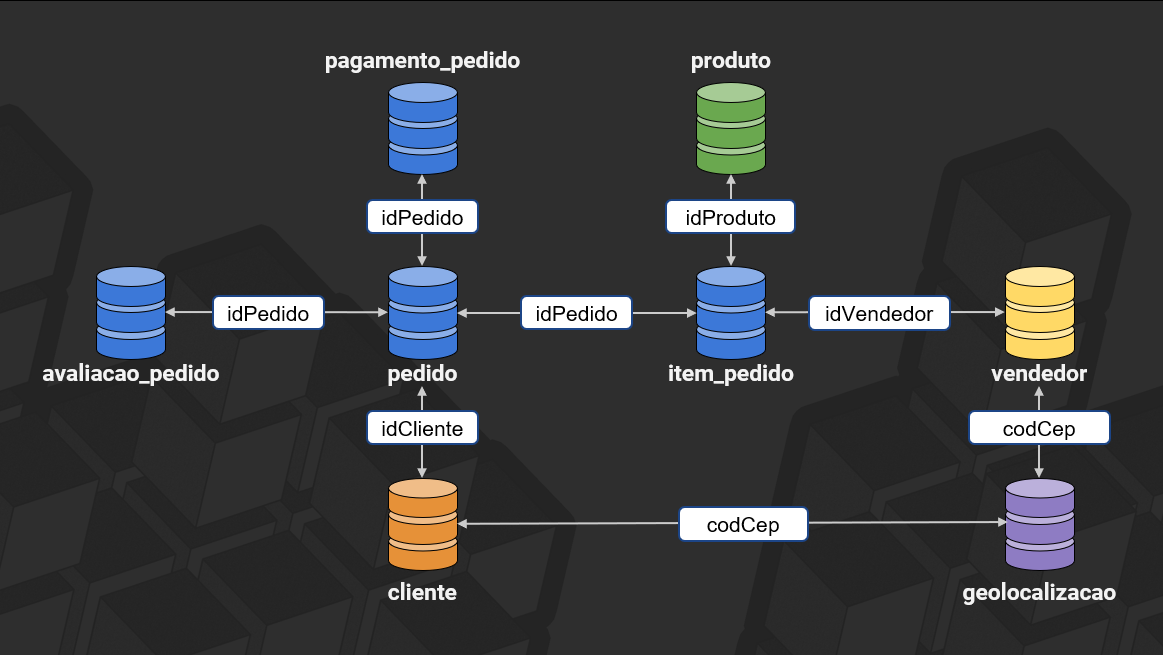

In [34]:
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
from sqlalchemy import create_engine, text

In [4]:
my_conn = create_engine('sqlite:////content/drive/MyDrive/ML + Teo/data/olist.db')

In [5]:
# Get a connection from the engine
conn = my_conn.connect()

# Definição de variáveis

Variáveis de avaliação

- Avaliação média em NPS

- Nota media da avaliação

- quantidade de avaliações

- quantidade de avaliações negativas

Variáveis de vendas

- Qtd de vendas

- Qtd de vendas / dia

- Qtd de vendas (pedidos)

- Qtd de bedas Itens

- LTV

- Dias sem vender

- ticket médio

- Intervalo medio entre vendas

- dias desde a primeira venda 

- valor medio por produto

- maior valor de produto 

- maior valor de venda

- menor valor de produto

- menor valor de venda

- media valor de venda

- media valor de produto

- Media de itens por pedido

Variáveis de produto

- categorias de produto vendidas

- Tamanho do portfolio (qtd de itens distintos) 

- tamanho do produto por volume

- media quantidade de fotos por produto

Variaveis de clientes

- Regiões para onde vende

Variáveis de entrega

- % de entregas com atraso

- valor de frete (media ou mediana)

- tempo médio de entrega

- Pedidos cancelados

- diferença entre promessa em entrega (dias)

In [37]:
def cria_view (querycriaview = str, nome_tabela = str):
  'cria uma view, mas antes deleta se ela não existe'

  dropnatabela = f"DROP VIEW IF EXISTS {nome_tabela};"
  with conn.execute(text(dropnatabela)):
    pass
  with conn.execute(text(querycriaview)):
    pass
def executa_query (query_executa = str):
  try:
    df=conn.execute(text(query_executa)).fetchall()
    return pd.DataFrame(df)
  except: 
    pass

In [ ]:
# qual a nossa range de tempo
query = """
SELECT max(DATE(dtPedido)), 
min(DATE(dtPedido)), 
count(*)

      from pedido
;
"""
result = conn.execute(text(query)).fetchall()

result

[('2018-10-17', '2016-09-04', 99441)]

## Divisão Pagamento

Variáveis pagamento

- forma de pagamento (%)

- Qtd media de parcelas 

In [28]:
query = ''' create view tb_join as 
SELECT DISTINCT
      t1.idPedido,
       t3.idVendedor, 
       t1.*
       

from pedido as t1 

left join item_pedido as t3
      on t1.idPedido = t3.idPedido

where t1.dtPedido < '2018-01-01' -- 6 meses para frente
      and t1.dtPedido >= '2017-07-01'
      and t3.idVendedor is not Null
'''

cria_view(query, 'tb_join')


In [29]:
executa_query('select * from tb_join')

idPedido                        idVendedor  \
0      e481f51cbdc54678b7cc49136f2d6af7  3504c0cb71d7fa48d967e0e4c94d59d9   
1      949d5b44dbf5de918fe9c16f97b45f8a  66922902710d126a0e7d26b0e3805106   
2      a4591c265e18cb1dcee52889e2d8acc3  8581055ce74af1daba164fdbd55a40de   
3      e69bfb5eb88e0ed6a785585b27e16dbf  7c67e1448b00f6e969d365cea6b010ab   
4      34513ce0c4fab462a55830c0989c7edb  87142160b41353c4e5fca2360caf6f92   
...                                 ...                               ...   
30545  0e4b26f1fb99fc0f0472dd5f403d36d4  520b493b57809f446cb0a233bb3e25c7   
30546  b0f4af5c1b06e24fef510703bfe9f0a6  058fd0aa2bfdb2274e05e1ae971dabb6   
30547  cfa78b997e329a5295b4ee6972c02979  ce248b21cb2adc36282ede306b7660e5   
30548  9115830be804184b91f5c00f6f49f92d  1caf283236cd69af44cbc09a0a1e7d32   
30549  83c1379a015df1e13d02aae0204711ab  d50d79cb34e38265a8649c383dcffd48   

                             idPedido:1                         idCliente  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
2      a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
3      e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   
4      34513ce0c4fab462a55830c0989c7edb  7711cf624183d843aafe81855097bc37   
...                                 ...                               ...   
30545  0e4b26f1fb99fc0f0472dd5f403d36d4  2e96fa6d55b9732013caed9866e2552d   
30546  b0f4af5c1b06e24fef510703bfe9f0a6  8e1ec396e317ff4c82a03ce16a0c3eb3   
30547  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
30548  9115830be804184b91f5c00f6f49f92d  da2124f134f5dfbce9d06f29bdb6c308   
30549  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   

      descSituacao                    dtPedido                  dtAprovado  \
0        delivered  2017-10-02 10:56:33.000000  2017-10-02 11:07:15.000000   
1        delivered  2017-11-18 19:28:06.000000  2017-11-18 19:45:59.000000   
2        delivered  2017-07-09 21:57:05.000000  2017-07-09 22:10:13.000000   
3        delivered  2017-07-29 11:55:02.000000  2017-07-29 12:05:32.000000   
4        delivered  2017-07-13 19:58:11.000000  2017-07-13 20:10:08.000000   
...            ...                         ...                         ...   
30545    delivered  2017-11-05 16:17:53.000000  2017-11-05 16:30:29.000000   
30546    delivered  2017-10-27 15:21:00.000000  2017-10-27 15:32:49.000000   
30547    delivered  2017-12-20 09:52:41.000000  2017-12-20 10:09:52.000000   
30548    delivered  2017-10-04 19:57:37.000000  2017-10-04 20:07:14.000000   
30549    delivered  2017-08-27 14:46:43.000000  2017-08-27 15:04:16.000000   

                          dtEnvio                  dtEntregue  \
0      2017-10-04 19:55:00.000000  2017-10-10 21:25:13.000000   
1      2017-11-22 13:39:59.000000  2017-12-02 00:28:42.000000   
2      2017-07-11 14:58:04.000000  2017-07-26 10:57:55.000000   
3      2017-08-10 19:45:24.000000  2017-08-16 17:14:30.000000   
4      2017-07-14 18:43:29.000000  2017-07-19 14:04:48.000000   
...                           ...                         ...   
30545  2017-11-07 18:35:08.000000  2017-11-08 16:08:56.000000   
30546  2017-10-30 15:44:34.000000  2017-11-10 17:57:22.000000   
30547  2017-12-20 20:25:25.000000  2018-01-26 15:45:14.000000   
30548  2017-10-05 16:52:52.000000  2017-10-20 20:25:45.000000   
30549  2017-08-28 20:52:26.000000  2017-09-21 11:24:17.000000   

              dtEstimativaEntrega  
0      2017-10-18 00:00:00.000000  
1      2017-12-15 00:00:00.000000  
2      2017-08-01 00:00:00.000000  
3      2017-08-23 00:00:00.000000  
4      2017-08-08 00:00:00.000000  
...                           ...  
30545  2017-11-17 00:00:00.000000  
30546  2017-11-22 00:00:00.000000  
30547  2018-01-18 00:00:00.000000  
30548  2017-11-07 00:00:00.000000  
30549  2017-09-27 00:00:00.000000  

[30550 rows x 10 columns]

In [30]:
# selecionando nossa range de análise
query = """
create view tb_pagamento as
SELECT t1.idVendedor,
      t2.descTipoPagamento,
      count(distinct (t2.idPedido)) as qtdePedidoMeioPagamento,
      sum(t2.vlPagamento) as vlPedidoMeioPagamento, 
      t2.nrParcelas
       
from tb_join as t1

      left join pagamento_pedido as t2
      on t1.idPedido = t2.idPedido

      



group by idVendedor, descTipoPagamento
order by idVendedor, descTipoPagamento
      
;
"""
cria_view(query, 'tb_pagamento')


In [24]:
query = """
create view tb_pagamentos_sum as
SELECT  idVendedor,

sum (case when descTipoPagamento = 'credit_card' then 
    qtdePedidoMeioPagamento else 0 end) as qtde_boleto,
sum (case when descTipoPagamento = 'boleto' then 
    qtdePedidoMeioPagamento else 0 end) as qtde_credit_card,
sum (case when descTipoPagamento = 'debit_card' then 
    qtdePedidoMeioPagamento else 0 end) as qtde_voucher,
sum (case when descTipoPagamento = 'voucher' then 
    qtdePedidoMeioPagamento else 0 end) as qtde_debit_card,


sum (case when descTipoPagamento = 'credit_card' then 
    qtdePedidoMeioPagamento else 0 end) / sum(qtdePedidoMeioPagamento) 
        as pct_qtde_boleto,
sum (case when descTipoPagamento = 'boleto' then 
    qtdePedidoMeioPagamento else 0 end) / sum(qtdePedidoMeioPagamento) 
        as pct_qtde_credit_card,
sum (case when descTipoPagamento = 'debit_card' then 
    qtdePedidoMeioPagamento else 0 end) / sum(qtdePedidoMeioPagamento) 
        as pct_qtde_voucher,
sum (case when descTipoPagamento = 'voucher' then 
    qtdePedidoMeioPagamento else 0 end) / sum(qtdePedidoMeioPagamento) 
        as pct_qtde_debit_card,


sum (case when descTipoPagamento = 'credit_card' then 
    vlPedidoMeioPagamento else 0 end) as valor_boleto,
sum (case when descTipoPagamento = 'boleto' then 
    vlPedidoMeioPagamento else 0 end) as valor_credit_card,
sum (case when descTipoPagamento = 'debit_card' then 
    vlPedidoMeioPagamento else 0 end) as valor_voucher,
sum (case when descTipoPagamento = 'voucher' then 
    vlPedidoMeioPagamento else 0 end) as valor_debit_card,


sum (case when descTipoPagamento = 'credit_card' then 
    vlPedidoMeioPagamento else 0 end)/sum(vlPedidoMeioPagamento)  
        as pct_valor_boleto,
sum (case when descTipoPagamento = 'boleto' then 
    vlPedidoMeioPagamento else 0 end)/sum(vlPedidoMeioPagamento)  
        as pct_valor_credit_card,
sum (case when descTipoPagamento = 'debit_card' then 
    vlPedidoMeioPagamento else 0 end) /sum(vlPedidoMeioPagamento)  
        as pct_valor_voucher,
sum (case when descTipoPagamento = 'voucher' then 
    vlPedidoMeioPagamento else 0 end) /sum(vlPedidoMeioPagamento) 
        as pct_valor_debit_card


from tb_pagamento

group by idVendedor
      
;"""

cria_view(query, 'tb_pagamentos_sum')
tb_pagamentos_sum_df = executa_query('select * from tb_pagamentos_sum;')


In [9]:
'''

select idVendedor,
avg(nrParcelas) as avgQtdedeParcelas,
PERCENTILE_DISC(0.5) WITHIN GROUP (ORDER BY nrParcelas) AS medianQtdeParcelas

 from tb_pagamento


'''  ## fazer em pandas

tb_pagamento_df = executa_query('''select * from tb_pagamento 
where descTipoPagamento = "credit_card"''')

In [10]:
tb_pagamento_df

idVendedor descTipoPagamento  \
0     0015a82c2db000af6aaaf3ae2ecb0532       credit_card   
1     001cca7ae9ae17fb1caed9dfb1094831       credit_card   
2     002100f778ceb8431b7a1020ff7ab48f       credit_card   
3     003554e2dce176b5555353e4f3555ac8       credit_card   
4     004c9cd9d87a3c30c522c48c4fc07416       credit_card   
...                                ...               ...   
1401  ff69aa92bb6b1bf9b8b7a51c2ed9cf8b       credit_card   
1402  ff82e8873fba613f2261a9acc896fd84       credit_card   
1403  ffdd9f82b9a447f6f8d4b91554cc7dd3       credit_card   
1404  ffeee66ac5d5a62fe688b9d26f83f534       credit_card   
1405  fffd5413c0700ac820c7069d66d98c89       credit_card   

      qtdePedidoMeioPagamento  vlPedidoMeioPagamento  nrParcelas  
0                           3            2748.060059           4  
1                          77           12912.360046          10  
2                          21             710.630000           1  
3                           1             139.380005           3  
4                          63            8432.130009           5  
...                       ...                    ...         ...  
1401                        3            3007.140015          10  
1402                        1              31.010000           2  
1403                        4            1116.290001           2  
1404                        7            1191.159973           1  
1405                       15            3684.230045           1  

[1406 rows x 5 columns]

In [30]:
# Agrupa por idVendedor e calcula a média, mediana, máximo e mínimo das parcelas
tb_cartao = tb_pagamentos_sum_df.merge(tb_pagamento_df.groupby('idVendedor').agg(
    avgQtdedeParcelas=pd.NamedAgg(column='nrParcelas', aggfunc='mean'),
    medianQtdeParcelas=pd.NamedAgg(column='nrParcelas', aggfunc=lambda x: x.quantile(0.5)),
    maxQtdeParcelas=pd.NamedAgg(column='nrParcelas', aggfunc=max),
    minQtdeParcelas=pd.NamedAgg(column='nrParcelas', aggfunc=min)
).reset_index(), on='idVendedor', how='left')

tb_cartao['dtReference'] = '2018-01-01' # até esse dia nos ultimos 6m

# Imprime o resultado
print(tb_cartao)

#tb_cartao.to_sql(name='tb_cartao', con=conn, if_exists='replace', index=False)


                            idVendedor  qtde_boleto  qtde_credit_card  \
0     0015a82c2db000af6aaaf3ae2ecb0532            3                 0   
1     001cca7ae9ae17fb1caed9dfb1094831           77                18   
2     002100f778ceb8431b7a1020ff7ab48f           21                16   
3     003554e2dce176b5555353e4f3555ac8            1                 0   
4     004c9cd9d87a3c30c522c48c4fc07416           63                18   
...                                ...          ...               ...   
1479  ff69aa92bb6b1bf9b8b7a51c2ed9cf8b            3                 1   
1480  ff82e8873fba613f2261a9acc896fd84            1                 0   
1481  ffdd9f82b9a447f6f8d4b91554cc7dd3            4                 2   
1482  ffeee66ac5d5a62fe688b9d26f83f534            7                 2   
1483  fffd5413c0700ac820c7069d66d98c89           15                 3   

      qtde_voucher  qtde_debit_card  pct_qtde_boleto  pct_qtde_credit_card  \
0                0                0          

In [29]:
tb_cartao['avgQtdedeParcelas'].isnull().sum() + (tb_cartao['avgQtdedeParcelas'] == 0).sum()



78

In [35]:
tb_cartao.to_csv('/content/drive/MyDrive/ML + Teo/data/silver/tb_cartao.csv', index=False)

In [36]:
del tb_cartao, tb_pagamento_df,tb_pagamentos_sum_df

## cliente

In [ ]:
dsc

São tabelas:

pedido

pagamento_pedido

produto

cliente

geolocalizacao

item_pedido

avaliacao_pedido

vendedor